In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [3]:
data = pd.read_excel('/content/GDP.xlsx', index_col=0)

In [4]:
data

,GDP
time,
1987-01-01,8375.274
1987-04-01,8465.630
1987-07-01,8539.075
1987-10-01,8685.694
1988-01-01,8730.569
...,...
2022-01-01,19924.088
2022-04-01,19895.271
2022-07-01,20054.663


from matplotlib import pyplot as plt
data['GDP'].plot(kind='hist', bins=20, title='GDP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['GDP'].plot(kind='line', figsize=(8, 4), title='GDP')
plt.gca().spines[['top', 'right']].set_visible(False)

# How to Graph the Data

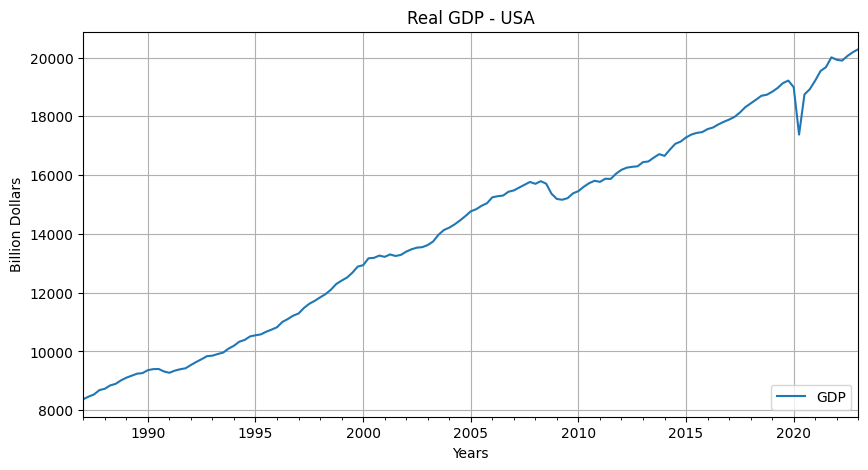

In [5]:
data.plot(figsize=(10,5), grid=True)
plt.title("Real GDP - USA")
plt.xlabel("Years")
plt.ylabel("Billion Dollars")
plt.legend(loc='lower right')
plt.savefig('example.png', facecolor='white')

# How to Test for Stationarity

## Autocorrelation Function

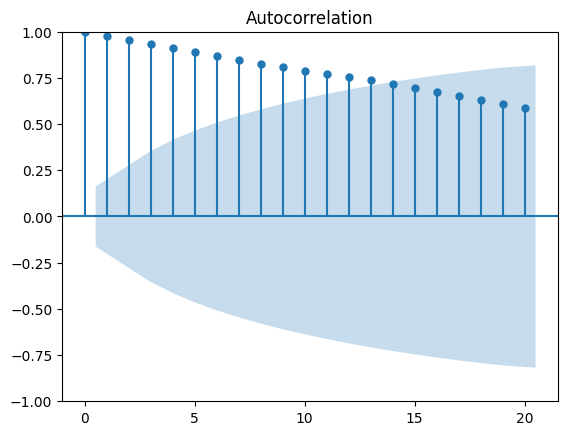

<Figure size 640x480 with 0 Axes>

In [6]:
plot_acf(data['GDP'], lags=20)
plt.show()
plt.savefig('ac.png', facecolor='white')

## Augmented Dickey Fuller Test

In [7]:
adftest = adfuller(data['GDP'], autolag = 'AIC', regression = 'ct')
print("ADF Test Results")
print("Null Hypothesis: The series has an Unit Root")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and our series is Stationary")


ADF Test Results
Null Hypothesis: The series has an Unit Root
ADF-Statistic: -2.675246636584709
P-Value: 0.2465034594697572
Number of lags: 1
Number of observations: 143
Critical Values {'1%': -4.023514459232879, '5%': -3.441649494385999, '10%': -3.145330713164287}
Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and our series is Stationary


## Transform the series into Stationary

## Apply Logs, Differences and then multiply x100 = GDP Growth (%Change)

### 1st Step: Apply Logs

In [8]:
data['GDP_logs'] = np.log(data['GDP'])

### 2nd Step: Apply 1st Differences

In [9]:
data["GDP_diff"] = data['GDP_logs'].diff()

### 3rd Step: Multiply x100

In [10]:
data['GDP_growth'] = data['GDP_diff']*100

In [11]:
data

,GDP,GDP_logs,GDP_diff,GDP_growth
time,,,,
1987-01-01,8375.274,9.033039,NaN,NaN
1987-04-01,8465.630,9.043770,0.010731,1.073064
1987-07-01,8539.075,9.052408,0.008638,0.863825
1987-10-01,8685.694,9.069433,0.017025,1.702462
1988-01-01,8730.569,9.074586,0.005153,0.515324
...,...,...,...,...
2022-01-01,19924.088,9.899685,-0.004112,-0.411182
2022-04-01,19895.271,9.898237,-0.001447,-0.144739
2022-07-01,20054.663,9.906217,0.007980,0.797963


# Graph GDP Growth

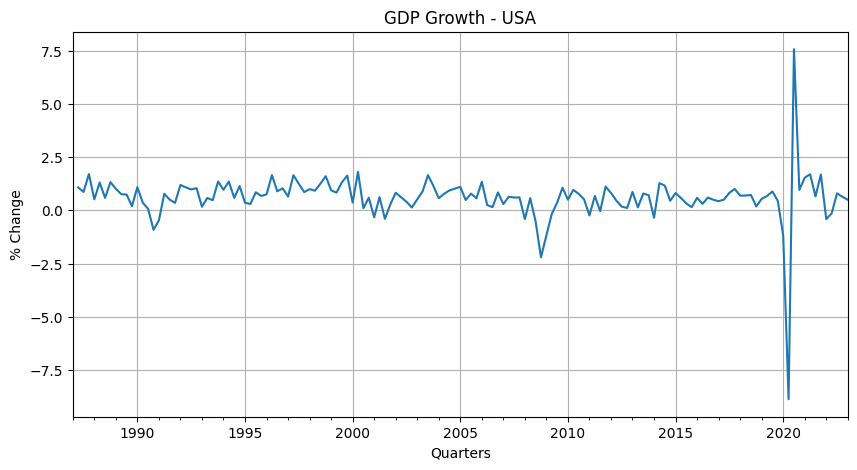

In [12]:
data["GDP_growth"].plot(figsize = (10,5), grid=True)
plt.title('GDP Growth - USA')
plt.xlabel('Quarters')
plt.ylabel('% Change')
plt.savefig('Growth.png', facecolor='white')
plt.show()

## ACF For the GDP Growth Series

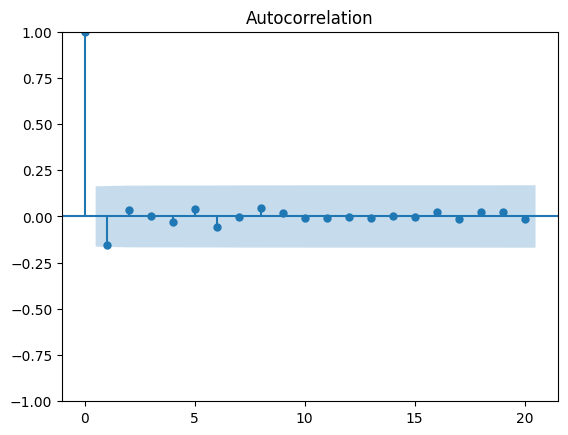

In [13]:
plot_acf(data['GDP_growth'].dropna(), lags=20)
plt.savefig('ac2.png', facecolor='white')
plt.show()

# Augmented Dickey Fuller Test - GDP Growth Series

In [15]:
adftest = adfuller(data['GDP_growth'].dropna(), autolag = 'AIC', regression = 'n')
print("ADF Test Results")
print("Null Hypothesis: The series has an Unit Root")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary")

ADF Test Results
Null Hypothesis: The series has an Unit Root
ADF-Statistic: -3.1040018031033676
P-Value: 0.0018979674511649582
Number of lags: 4
Number of observations: 139
Critical Values {'1%': -2.5820126152890635, '5%': -1.9430949109311486, '10%': -1.615040233175294}
Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary
